### Import the packages

In [1]:
import pandas as pd
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


import PyPDF2

import tabula
from tabula import read_pdf
from tabula import convert_into

import folium
from folium.plugins import HeatMap


import requests # library to handle requests


print('Folium installed')
print('Libraries imported.')

print('So let it be written, so let it be done')

Folium installed
Libraries imported.
So let it be written, so let it be done


### Input my Foursquare Credentials. Hide this later.

In [2]:
CLIENT_ID = 'ELVYJAHYRPM2I4BTAWNIIPN3FDGSHDJBOEQ4MDQATBJR3Y3V' # your Foursquare ID
CLIENT_SECRET = 'A4BSYN5PUAVP4QAHZ5E0AT0YDHF2QQIVQ1QE0GR4PMVWIAJ5' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ELVYJAHYRPM2I4BTAWNIIPN3FDGSHDJBOEQ4MDQATBJR3Y3V
CLIENT_SECRET:A4BSYN5PUAVP4QAHZ5E0AT0YDHF2QQIVQ1QE0GR4PMVWIAJ5


### Read and make a data frame from csv, then make a chart for regional population

In [3]:
region_pop = pd.read_csv('Population by Region - New Zealand.csv')

In [4]:
region_pop_drop = region_pop.drop(['Regional council','Chair','Seats','Council seat','ISO 3166-2 Code','Density(pop per km²)'], axis=1)

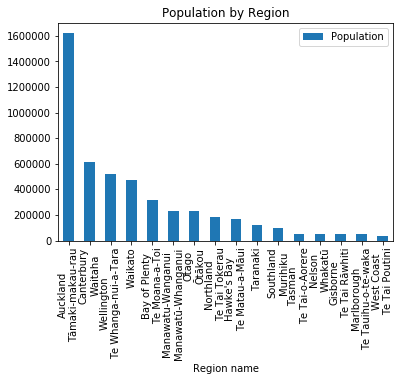

In [5]:
df_pop = region_pop_drop.plot.bar(x='Region name',y='Population')
df_pop.set_title('Population by Region')
df_pop

### Read and make a data frame from csv, then make a chart for growth rate

In [6]:
region_per = pd.read_csv('regional-population-change,-by-component,-year-ended-30-june-2019.csv')
df_north = region_per[region_per.Island == 'North']

In [7]:
df_north

,Region,Natural increase,Net migration,Total Increase,Island
0,Northland,0.33,1.93,2.26,North
1,Waikato,0.62,1.49,2.11,North
2,Bay of Plenty,0.44,1.60,2.04,North
6,Auckland,0.80,0.71,1.51,North
7,Manawatū-Whanganui,0.37,1.06,1.43,North
8,Taranaki,0.53,0.81,1.34,North
9,Hawke's Bay,0.32,1.01,1.33,North
10,Wellington,0.47,0.63,1.10,North
14,Gisborne,0.59,0.19,0.78,North


Text(0.5, 1.0, 'Population Growth by Percent 2019')

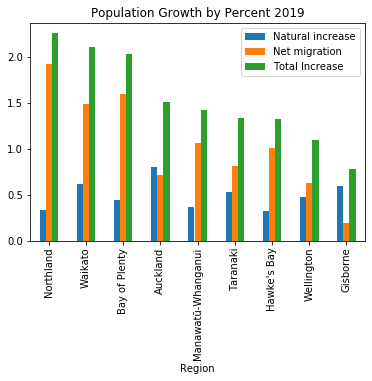

In [8]:
bar_north = df_north.plot.bar(x='Region')
bar_north.set_title('Population Growth by Percent 2019') 

### Set coordinates for Auckland and Wellington

In [9]:
Auck_lat = -36.852095
Auck_long = 174.7631803

Well_lat = -41.2866402
Well_long =174.7755737

### Define the type of restaurant we are looking for

In [10]:
search_query = 'Mexican'
radius = 15000
print(search_query + ' .... OK!')

Mexican .... OK!


### Define the corresponding URL

In [11]:
# This is the Auckland coordinates
Auck_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, Auck_lat, Auck_long, VERSION, search_query, radius, LIMIT)
Auck_url

'https://api.foursquare.com/v2/venues/search?client_id=ELVYJAHYRPM2I4BTAWNIIPN3FDGSHDJBOEQ4MDQATBJR3Y3V&client_secret=A4BSYN5PUAVP4QAHZ5E0AT0YDHF2QQIVQ1QE0GR4PMVWIAJ5&ll=-36.852095,174.7631803&v=20180604&query=Mexican&radius=15000&limit=30'

In [12]:
# This the Wellington
Well_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, Well_lat, Well_long, VERSION, search_query, radius, LIMIT)
Well_url

'https://api.foursquare.com/v2/venues/search?client_id=ELVYJAHYRPM2I4BTAWNIIPN3FDGSHDJBOEQ4MDQATBJR3Y3V&client_secret=A4BSYN5PUAVP4QAHZ5E0AT0YDHF2QQIVQ1QE0GR4PMVWIAJ5&ll=-41.2866402,174.7755737&v=20180604&query=Mexican&radius=15000&limit=30'

### Send get requests for Auckland and Wellington

In [13]:
Auck_results = requests.get(Auck_url).json()
Auck_results

{'meta': {'code': 200, 'requestId': '5e7677996d8c56001b8d1a4e'},
 'response': {'venues': [{'id': '4b94815bf964a520b47b34e3',
    'name': 'Mexican Cafe',
    'location': {'address': '67 Victoria St. W',
     'lat': -36.84847412573437,
     'lng': 174.7630356519606,
     'labeledLatLngs': [{'label': 'display',
       'lat': -36.84847412573437,
       'lng': 174.7630356519606}],
     'distance': 403,
     'postalCode': '1010',
     'cc': 'NZ',
     'city': 'Auckland',
     'state': 'Auckland',
     'country': 'New Zealand',
     'formattedAddress': ['67 Victoria St. W',
      'Auckland 1010',
      'New Zealand']},
    'categories': [{'id': '4bf58dd8d48988d1c1941735',
      'name': 'Mexican Restaurant',
      'pluralName': 'Mexican Restaurants',
      'shortName': 'Mexican',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/mexican_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1584822226',
    'hasPerk': False},
   {'id': '536c8c7d498e38b08

In [14]:
Well_results = requests.get(Well_url).json()
Well_results

{'meta': {'code': 200, 'requestId': '5e7677fe77af03001b8db858'},
 'response': {'venues': [{'id': '4e2f5c9d52b111a1e383567d',
    'name': 'Mexican QBT',
    'location': {'address': '180 Lambton Quay',
     'lat': -41.281811853897096,
     'lng': 174.77616420193974,
     'labeledLatLngs': [{'label': 'display',
       'lat': -41.281811853897096,
       'lng': 174.77616420193974}],
     'distance': 539,
     'postalCode': '6011',
     'cc': 'NZ',
     'city': 'Wellington Central',
     'state': 'Wellington',
     'country': 'New Zealand',
     'formattedAddress': ['180 Lambton Quay',
      'Wellington Central 6011',
      'New Zealand']},
    'categories': [{'id': '4bf58dd8d48988d1c1941735',
      'name': 'Mexican Restaurant',
      'pluralName': 'Mexican Restaurants',
      'shortName': 'Mexican',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/mexican_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1584822227',
    'hasPerk': False},
   {'

### Get relevant part of JSON and transform it into a *pandas* dataframe

In [15]:
# This is for Auckland

# assign relevant part of JSON to venues
Auck_venues = Auck_results['response']['venues']

# tranform venues into a dataframe
Auck_dataframe = pd.json_normalize(Auck_venues)
Auck_dataframe.head()


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,4b94815bf964a520b47b34e3,Mexican Cafe,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1584822226,False,67 Victoria St. W,-36.848474,174.763036,"[{'label': 'display', 'lat': -36.8484741257343...",403,1010,NZ,Auckland,Auckland,New Zealand,"[67 Victoria St. W, Auckland 1010, New Zealand]",NaN
1,536c8c7d498e38b08bce9e37,Chilando Mexican Taqueria,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1584822226,False,NaN,-36.845076,174.768059,"[{'label': 'display', 'lat': -36.8450760271895...",894,NaN,NZ,NaN,NaN,New Zealand,[New Zealand],NaN
2,4c688a0e73851b8d300bbb39,Amigos Mexican Cuisine,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1584822226,False,NaN,-36.858514,174.748152,"[{'label': 'display', 'lat': -36.8585139227729...",1517,NaN,NZ,NaN,NaN,New Zealand,[New Zealand],NaN
3,5105eb66e4b02656cabd11c6,Mexican,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1584822226,False,NaN,-36.792927,174.745148,"[{'label': 'display', 'lat': -36.7929267883300...",6779,NaN,NZ,NaN,NaN,New Zealand,[New Zealand],NaN
4,508302d7e4b0e5b152762d24,Mexican Supremo,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1584822226,False,5470P Mt Albert Rd Royal Oak,-36.909202,174.761007,"[{'label': 'display', 'lat': -36.9092015744222...",6359,NaN,NZ,NaN,NaN,New Zealand,"[5470P Mt Albert Rd Royal Oak, New Zealand]",NaN


In [16]:
# This is for Wellington

# assign relevant part of JSON to venues
Well_venues = Well_results['response']['venues']

# tranform venues into a dataframe
Well_dataframe = pd.json_normalize(Well_venues)
Well_dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,4e2f5c9d52b111a1e383567d,Mexican QBT,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1584822227,False,180 Lambton Quay,-41.281812,174.776164,"[{'label': 'display', 'lat': -41.2818118538970...",539,6011,NZ,Wellington Central,Wellington,New Zealand,"[180 Lambton Quay, Wellington Central 6011, Ne...",NaN
1,5047eb43e4b00f91b992170e,Mexican QBT,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1584822227,False,Brandon St,-41.283566,174.776819,"[{'label': 'display', 'lat': -41.283566, 'lng'...",357,NaN,NZ,Wellington,Wellington,New Zealand,"[Brandon St (Featherston), Wellington, New Zea...",Featherston
2,4ddafc3f2271ac90476a0a88,Mexican QBT,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1584822227,False,33 Customhouse Qy,-41.282821,174.778916,"[{'label': 'display', 'lat': -41.2828210209535...",508,6011,NZ,Wellington Central,Wellington,New Zealand,"[33 Customhouse Qy, Wellington Central 6011, N...",NaN
3,59a13821b1ec13335642b58c,Zambrero,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1584822227,False,Courtenay Place,-41.293290,174.780350,"[{'label': 'display', 'lat': -41.29329, 'lng':...",841,6011,NZ,Wellington,Wellington,New Zealand,"[Courtenay Place, Wellington 6011, New Zealand]",NaN


### Define information of interest in Auckland and filter dataframe

In [17]:
# keep only columns that include venue name, and anything that is associated with location
Auck_filtered_columns = ['name', 'categories'] + [col for col in Auck_dataframe.columns if col.startswith('location.')] + ['id']
Auck_dataframe_filtered = Auck_dataframe.loc[:, Auck_filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
Auck_dataframe_filtered['categories'] = Auck_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
Auck_dataframe_filtered.columns = [column.split('.')[-1] for column in Auck_dataframe_filtered.columns]

Auck_dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Mexican Cafe,Mexican Restaurant,67 Victoria St. W,-36.848474,174.763036,"[{'label': 'display', 'lat': -36.8484741257343...",403,1010,NZ,Auckland,Auckland,New Zealand,"[67 Victoria St. W, Auckland 1010, New Zealand]",NaN,4b94815bf964a520b47b34e3
1,Chilando Mexican Taqueria,Mexican Restaurant,NaN,-36.845076,174.768059,"[{'label': 'display', 'lat': -36.8450760271895...",894,NaN,NZ,NaN,NaN,New Zealand,[New Zealand],NaN,536c8c7d498e38b08bce9e37
2,Amigos Mexican Cuisine,Mexican Restaurant,NaN,-36.858514,174.748152,"[{'label': 'display', 'lat': -36.8585139227729...",1517,NaN,NZ,NaN,NaN,New Zealand,[New Zealand],NaN,4c688a0e73851b8d300bbb39
3,Mexican,Mexican Restaurant,NaN,-36.792927,174.745148,"[{'label': 'display', 'lat': -36.7929267883300...",6779,NaN,NZ,NaN,NaN,New Zealand,[New Zealand],NaN,5105eb66e4b02656cabd11c6
4,Mexican Supremo,Mexican Restaurant,5470P Mt Albert Rd Royal Oak,-36.909202,174.761007,"[{'label': 'display', 'lat': -36.9092015744222...",6359,NaN,NZ,NaN,NaN,New Zealand,"[5470P Mt Albert Rd Royal Oak, New Zealand]",NaN,508302d7e4b0e5b152762d24
5,Mexicana Cabana,Mexican Restaurant,NaN,-36.862014,174.761429,"[{'label': 'display', 'lat': -36.862014, 'lng'...",1115,NaN,NZ,NaN,NaN,New Zealand,[New Zealand],NaN,4fd1be23e4b065a3534786bb
6,Mexican Playground,Playground,NaN,-36.890316,174.822536,"[{'label': 'display', 'lat': -36.890316, 'lng'...",6785,NaN,NZ,NaN,NaN,New Zealand,[New Zealand],NaN,4d5eece414963704a962d094
7,Mexican Food And Liqour,Mexican Restaurant,4 The Strand,-36.792996,174.745142,"[{'label': 'display', 'lat': -36.7929959447971...",6772,NaN,NZ,North Shore,Auckland,New Zealand,"[4 The Strand (Takapuna), North Shore, New Zea...",Takapuna,5105ece2e4b08881f793b1fb
8,Mexican Specialties,Mexican Restaurant,124 Celtic Crescent,-36.890950,174.821971,"[{'label': 'display', 'lat': -36.8909495899842...",6791,1051,NZ,NaN,Auckland,New Zealand,"[124 Celtic Crescent, 1051, New Zealand]",NaN,4c37c23818e72d7f963017f5
9,Frida Cocina Mexicana & Tequila Bar,Mexican Restaurant,NaN,-36.843165,174.763131,"[{'label': 'display', 'lat': -36.843165, 'lng'...",994,NaN,NZ,NaN,NaN,New Zealand,[New Zealand],NaN,5656a9c9498e674648df6119


### What restaurants are Auckland

In [18]:
Auck_dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Mexican Cafe,Mexican Restaurant,67 Victoria St. W,-36.848474,174.763036,"[{'label': 'display', 'lat': -36.8484741257343...",403,1010,NZ,Auckland,Auckland,New Zealand,"[67 Victoria St. W, Auckland 1010, New Zealand]",NaN,4b94815bf964a520b47b34e3
1,Chilando Mexican Taqueria,Mexican Restaurant,NaN,-36.845076,174.768059,"[{'label': 'display', 'lat': -36.8450760271895...",894,NaN,NZ,NaN,NaN,New Zealand,[New Zealand],NaN,536c8c7d498e38b08bce9e37
2,Amigos Mexican Cuisine,Mexican Restaurant,NaN,-36.858514,174.748152,"[{'label': 'display', 'lat': -36.8585139227729...",1517,NaN,NZ,NaN,NaN,New Zealand,[New Zealand],NaN,4c688a0e73851b8d300bbb39
3,Mexican,Mexican Restaurant,NaN,-36.792927,174.745148,"[{'label': 'display', 'lat': -36.7929267883300...",6779,NaN,NZ,NaN,NaN,New Zealand,[New Zealand],NaN,5105eb66e4b02656cabd11c6
4,Mexican Supremo,Mexican Restaurant,5470P Mt Albert Rd Royal Oak,-36.909202,174.761007,"[{'label': 'display', 'lat': -36.9092015744222...",6359,NaN,NZ,NaN,NaN,New Zealand,"[5470P Mt Albert Rd Royal Oak, New Zealand]",NaN,508302d7e4b0e5b152762d24
5,Mexicana Cabana,Mexican Restaurant,NaN,-36.862014,174.761429,"[{'label': 'display', 'lat': -36.862014, 'lng'...",1115,NaN,NZ,NaN,NaN,New Zealand,[New Zealand],NaN,4fd1be23e4b065a3534786bb
6,Mexican Playground,Playground,NaN,-36.890316,174.822536,"[{'label': 'display', 'lat': -36.890316, 'lng'...",6785,NaN,NZ,NaN,NaN,New Zealand,[New Zealand],NaN,4d5eece414963704a962d094
7,Mexican Food And Liqour,Mexican Restaurant,4 The Strand,-36.792996,174.745142,"[{'label': 'display', 'lat': -36.7929959447971...",6772,NaN,NZ,North Shore,Auckland,New Zealand,"[4 The Strand (Takapuna), North Shore, New Zea...",Takapuna,5105ece2e4b08881f793b1fb
8,Mexican Specialties,Mexican Restaurant,124 Celtic Crescent,-36.890950,174.821971,"[{'label': 'display', 'lat': -36.8909495899842...",6791,1051,NZ,NaN,Auckland,New Zealand,"[124 Celtic Crescent, 1051, New Zealand]",NaN,4c37c23818e72d7f963017f5
9,Frida Cocina Mexicana & Tequila Bar,Mexican Restaurant,NaN,-36.843165,174.763131,"[{'label': 'display', 'lat': -36.843165, 'lng'...",994,NaN,NZ,NaN,NaN,New Zealand,[New Zealand],NaN,5656a9c9498e674648df6119


### Render map for Auckland with restaurants plotted on the map

In [19]:
auck_map = folium.Map(location=[-36.848461, 174.763336], zoom_start=11, tiles='Openstreetmap')

In [20]:
# add a red circle marker to represent the centroid of Auckland 
folium.features.CircleMarker(
    [Auck_lat, Auck_long],
    radius=10,
    color='red',
    popup='Auckland',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(auck_map)

# add the Mexican restaurants as blue circle markers
for lat, lng, label in zip(Auck_dataframe_filtered.lat, Auck_dataframe_filtered.lng, Auck_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(auck_map)

auck_map

### Create heat map for Auckland and its resaurants to better see gaps in locations.

In [21]:
auck_heat = folium.Map(location=[-36.848461, 174.763336], zoom_start=12, tiles='Openstreetmap')

In [22]:
for_map = Auck_dataframe_filtered #dataframe

hmap = auck_heat #the base map

hm_wide = HeatMap(list(zip(for_map.lat.values, for_map.lng.values)),
                     min_opacity=2,
                     radius=30, blur=45,
                     max_zoom=1
                 )
hmap.add_child(hm_wide)   # Adds the hm_wide to hmap


# The following code and analysys was not needed at this time as the potential in Auckland was much greater than in Wellington

### Define information of interest in Wellington and filter dataframe

In [23]:
# keep only columns that include venue name, and anything that is associated with location
Well_filtered_columns = ['name', 'categories'] + [col for col in Well_dataframe.columns if col.startswith('location.')] + ['id']
Well_dataframe_filtered = Well_dataframe.loc[:, Well_filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
Well_dataframe_filtered['categories'] = Well_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
Well_dataframe_filtered.columns = [column.split('.')[-1] for column in Well_dataframe_filtered.columns]

Well_dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Mexican QBT,Mexican Restaurant,180 Lambton Quay,-41.281812,174.776164,"[{'label': 'display', 'lat': -41.2818118538970...",539,6011,NZ,Wellington Central,Wellington,New Zealand,"[180 Lambton Quay, Wellington Central 6011, Ne...",NaN,4e2f5c9d52b111a1e383567d
1,Mexican QBT,Mexican Restaurant,Brandon St,-41.283566,174.776819,"[{'label': 'display', 'lat': -41.283566, 'lng'...",357,NaN,NZ,Wellington,Wellington,New Zealand,"[Brandon St (Featherston), Wellington, New Zea...",Featherston,5047eb43e4b00f91b992170e
2,Mexican QBT,Mexican Restaurant,33 Customhouse Qy,-41.282821,174.778916,"[{'label': 'display', 'lat': -41.2828210209535...",508,6011,NZ,Wellington Central,Wellington,New Zealand,"[33 Customhouse Qy, Wellington Central 6011, N...",NaN,4ddafc3f2271ac90476a0a88
3,Zambrero,Mexican Restaurant,Courtenay Place,-41.293290,174.780350,"[{'label': 'display', 'lat': -41.29329, 'lng':...",841,6011,NZ,Wellington,Wellington,New Zealand,"[Courtenay Place, Wellington 6011, New Zealand]",NaN,59a13821b1ec13335642b58c


### Drop columns that are not needed.

In [24]:
Well_dataframe_filtered_2 = Well_dataframe_filtered.drop(['cc','crossStreet','id'], axis=1)
#list(Well_dataframe_filtered.columns)


In [25]:
Well_dataframe_filtered_2.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,city,state,country,formattedAddress
0,Mexican QBT,Mexican Restaurant,180 Lambton Quay,-41.281812,174.776164,"[{'label': 'display', 'lat': -41.2818118538970...",539,6011,Wellington Central,Wellington,New Zealand,"[180 Lambton Quay, Wellington Central 6011, Ne..."
1,Mexican QBT,Mexican Restaurant,Brandon St,-41.283566,174.776819,"[{'label': 'display', 'lat': -41.283566, 'lng'...",357,NaN,Wellington,Wellington,New Zealand,"[Brandon St (Featherston), Wellington, New Zea..."
2,Mexican QBT,Mexican Restaurant,33 Customhouse Qy,-41.282821,174.778916,"[{'label': 'display', 'lat': -41.2828210209535...",508,6011,Wellington Central,Wellington,New Zealand,"[33 Customhouse Qy, Wellington Central 6011, N..."
3,Zambrero,Mexican Restaurant,Courtenay Place,-41.293290,174.780350,"[{'label': 'display', 'lat': -41.29329, 'lng':...",841,6011,Wellington,Wellington,New Zealand,"[Courtenay Place, Wellington 6011, New Zealand]"


In [26]:
Well_group = Well_dataframe_filtered_2.groupby(['city','postalCode']).size()
print(Well_group)

city                postalCode
Wellington          6011          1
Wellington Central  6011          2
dtype: int64


### What restaurants are Wellington

In [27]:
Well_dataframe_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Mexican QBT,Mexican Restaurant,180 Lambton Quay,-41.281812,174.776164,"[{'label': 'display', 'lat': -41.2818118538970...",539,6011,NZ,Wellington Central,Wellington,New Zealand,"[180 Lambton Quay, Wellington Central 6011, Ne...",NaN,4e2f5c9d52b111a1e383567d
1,Mexican QBT,Mexican Restaurant,Brandon St,-41.283566,174.776819,"[{'label': 'display', 'lat': -41.283566, 'lng'...",357,NaN,NZ,Wellington,Wellington,New Zealand,"[Brandon St (Featherston), Wellington, New Zea...",Featherston,5047eb43e4b00f91b992170e
2,Mexican QBT,Mexican Restaurant,33 Customhouse Qy,-41.282821,174.778916,"[{'label': 'display', 'lat': -41.2828210209535...",508,6011,NZ,Wellington Central,Wellington,New Zealand,"[33 Customhouse Qy, Wellington Central 6011, N...",NaN,4ddafc3f2271ac90476a0a88
3,Zambrero,Mexican Restaurant,Courtenay Place,-41.293290,174.780350,"[{'label': 'display', 'lat': -41.29329, 'lng':...",841,6011,NZ,Wellington,Wellington,New Zealand,"[Courtenay Place, Wellington 6011, New Zealand]",NaN,59a13821b1ec13335642b58c


### Render map for Wellington with restaurants plotted on the map

In [28]:
well_map = folium.Map(location=[Well_lat, 174.7755737], zoom_start=13, tiles='Openstreetmap')

# add a red circle marker to represent the centroid of Wellington 
folium.features.CircleMarker(
    [Well_lat, Well_long],
    radius=10,
    color='red',
    popup='Wellington',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(well_map)

# add the Mexican restaurants as blue circle markers
for lat, lng, label in zip(Well_dataframe_filtered.lat, Well_dataframe_filtered.lng, Well_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(well_map)


well_map